
## This exercise is adapted from scikit-learn's [tutorial](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html) on zero shot learning .

This example demonstrates the power of semisupervised learning by training a Label Spreading model to classify handwritten digits with sets of very few labels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report


1. Shuffle the indices
2. Use the shuffled indices to extract 1000 random samples from the features data
3. Extract the corresponding 1000 labels and images
4. Copy the labels. Treat the first 50 shuffled samples as labeled data and the rest as unlabeled data. Replace the labels after the first 50 with -1.

We'll use this copy of our labels (with 50 labels known and the other 950 hidden) to train our model, and use the original copy (with all 1000 labels known) to evaluate the model.

In [ ]:
# Load the digits dataset
# digits = {data,target,indices}; n = 1797
#digits.keys() = dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits = datasets.load_digits()

# Seting the random state to 2 for reproducibility
rng = np.random.RandomState(2)


# Initializing the indices as an ordered array, with each element corresponding to a sample in the dataset
indices = np.arange(len(digits.data))

# Shuffle the indices
rng.shuffle(indices)

# Use the shuffled indices to extract 1000 feature vectors, labels, and images
n_total_samples = 1000
# Features
X = digits.data[indices[:1000]]
# Labels
y = digits.target[indices[:1000]]
# Images
images =  digits.images[indices[:1000]]

# Copy the labels
y_train = np.copy(y)

#**********************************************************************************************
# Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled *
#**********************************************************************************************
n_labeled_points = 50 #these are the number of labeled images
# Create an ordered array of indices of the training data
train_indices =np.arange(n_total_samples)
# Define the training data indices after n_labeled_points as unlabeled
indices = np.arange(1000) # redifine indices since we are only using 1000 datapoints
unlabeled_set = indices[n_labeled_points:]
# Conduct the label replacement
y_train[unlabeled_set] = -1

### Verifying that the labels are randomly distributed and all the labels after the first 50 in `y_train` are hidden

In [ ]:
print(y_train[0:100])

[ 4  0  9  1  4  7  1  5  1  6  6  7  6  1  5  5  4  6  2  7  4  6  4  1
  5  2  9  5  4  6  5  6  3  4  0  9  9  8  4  6  8  8  5  7  9  6  9  6
  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


Trainingthe label propagation model with `gamma = 0.25` and `max_iter = 20`


In [ ]:
lp_model = LabelSpreading(gamma = 0.25 , max_iter = 20)
lp_model.fit(X, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

### Evaluating the model's performance on the unlabeled data

In [ ]:
# Extracting the label predictions for the unlabeled data
predicted_labels = lp_model.transduction_[unlabeled_set]
# Extracting the true labels of the unlabeled data
true_labels = y[unlabeled_set]
# Computing the confusion matrix between the true and predicted labels of the unlabeled data
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_) #for labels the model finds the 9 classes

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 50 labeled & 950 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.85      0.90      0.88        93
           2       0.99      0.78      0.87        91
           3       0.92      0.90      0.91       108
           4       0.97      1.00      0.98        88
           5       0.97      0.93      0.95       102
           6       0.97      1.00      0.99       100
           7       0.98      0.91      0.94        91
           8       0.86      0.82      0.84        87
           9       0.77      0.97      0.86        92

    accuracy                           0.92       950
   macro avg       0.93      0.92      0.92       950
weighted avg       0.93      0.92      0.92       950

Confusion matrix
[[ 98   0   0   0   0   0   0   0   0   0]
 [  0  84   0   0   1   1   0   0   3   4]
 [  0  12  71   0   0   0   0   1   7   0]
 [  0   0   0  97   0   0

In scikit learn confusion matrix the true labels are the vertical column. The number 8 gets confused the most , with 8 entries were it thought to be the number 3; the number 2 got confused by the number 1, 12 times~!

The 10 most uncertain labels

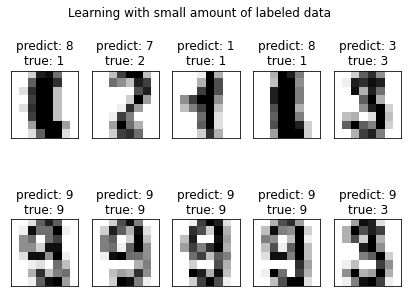

In [ ]:
# Calculating uncertainty values for each transduced distribution
# using scipy stats' entropy() 
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# top 10 most uncertain labels, in descending order of uncertainty
uncertainty_index = np.argsort(pred_entropies)[-10:]


f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()


> Bloc con sangría



### Exercise: Repeat the experiment with 10, 100, and 250 labeled images. How do the differing numbers of labeled samples affect the model's performance? Which number detections yield the most errors?




##Experiment with 10 labled images

Label Spreading model: 10 labeled & 990 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       0.64      0.54      0.59       101
           2       0.97      0.77      0.86        99
           3       0.84      0.99      0.91       103
           4       0.98      0.85      0.91        97
           5       0.54      0.69      0.60        99
           6       0.67      1.00      0.80       100
           7       0.92      0.99      0.96        98
           8       0.68      0.85      0.76        97
           9       0.88      0.15      0.26        98

    accuracy                           0.78       990
   macro avg       0.81      0.78      0.76       990
weighted avg       0.81      0.78      0.76       990

Confusion matrix
[[ 98   0   0   0   0   0   0   0   0   0]
 [  0  55   0   0   0   0  36   0  10   0]
 [  0   4  76   2   0   0   2   1  14   0]
 [  0   0   0 102   0   0

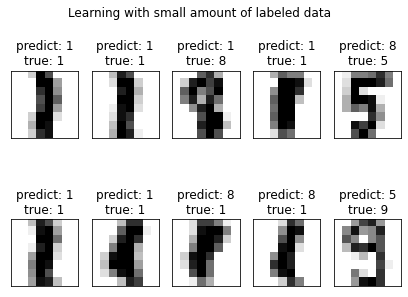

In [ ]:
n_total_samples = 1000
X = digits.data[indices[:1000]]
y = digits.target[indices[:1000]]
images =  digits.images[indices[:1000]]
y_train = np.copy(y)
n_labeled_points = 10#only 10 labeled images

train_indices =np.arange(n_total_samples)
indices = np.arange(1000) # redifine indices since we are only using 100 datapoints
unlabeled_set = indices[n_labeled_points:]
y_train[unlabeled_set] = -1
lp_model = LabelSpreading(gamma = 0.25 , max_iter = 20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_) #for labels the model finds the 9 classes
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
uncertainty_index = np.argsort(pred_entropies)[-10:]

f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))
f.suptitle('Learning with small amount of labeled data')
plt.show()

##with 100 labeled images

Label Spreading model: 100 labeled & 900 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.70      0.56      0.62        90
           2       0.92      0.99      0.95        90
           3       0.97      0.97      0.97        92
           4       1.00      0.94      0.97        90
           5       0.99      0.92      0.95        91
           6       0.75      0.99      0.85        90
           7       0.96      0.89      0.92        89
           8       0.91      0.88      0.89        90
           9       0.78      0.81      0.79        90

    accuracy                           0.89       900
   macro avg       0.90      0.89      0.89       900
weighted avg       0.90      0.89      0.89       900

Confusion matrix
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 50  5  0  0  0 30  0  5  0]
 [ 0  0 89  1  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  0  1  2]
 [ 0  2  0  0 85  0  

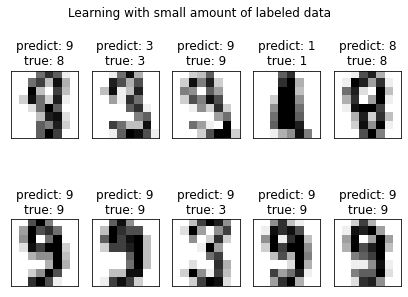

In [ ]:
n_total_samples = 1000
X = digits.data[indices[:1000]]
y = digits.target[indices[:1000]]
images =  digits.images[indices[:1000]]
y_train = np.copy(y)
n_labeled_points = 100 #100 labeled images

train_indices =np.arange(n_total_samples)
indices = np.arange(1000) # redifine indices since we are only using 100 datapoints
unlabeled_set = indices[n_labeled_points:]
y_train[unlabeled_set] = -1
lp_model = LabelSpreading(gamma = 0.25 , max_iter = 20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_) #for labels the model finds the 9 classes
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
uncertainty_index = np.argsort(pred_entropies)[-10:]

f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))
f.suptitle('Learning with small amount of labeled data')
plt.show()

with 250 labeled images

Label Spreading model: 250 labeled & 750 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.62      0.41      0.49        76
           2       0.94      0.99      0.96        74
           3       0.99      0.97      0.98        78
           4       1.00      0.93      0.97        74
           5       1.00      0.91      0.95        74
           6       0.71      1.00      0.83        76
           7       0.96      0.96      0.96        74
           8       0.83      0.91      0.86        74
           9       0.81      0.78      0.79        76

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

Confusion matrix
[[74  0  0  0  0  0  0  0  0  0]
 [ 0 31  5  0  0  0 28  0 12  0]
 [ 0  0 73  1  0  0  0  0  0  0]
 [ 0  0  0 76  0  0  0  0  0  2]
 [ 0  0  0  0 69  0  

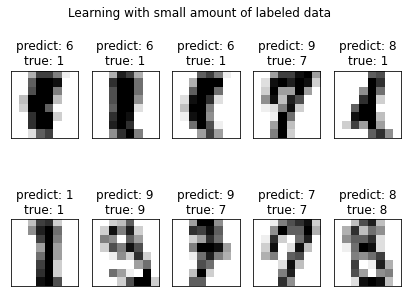

In [ ]:
n_total_samples = 1000
X = digits.data[indices[:1000]]
y = digits.target[indices[:1000]]
images =  digits.images[indices[:1000]]
y_train = np.copy(y)
n_labeled_points = 250 #250 labeled images

train_indices =np.arange(n_total_samples)
indices = np.arange(1000) # redifine indices since we are only using 100 datapoints
unlabeled_set = indices[n_labeled_points:]
y_train[unlabeled_set] = -1
lp_model = LabelSpreading(gamma = 0.25 , max_iter = 20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_) #for labels the model finds the 9 classes
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))
print(classification_report(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
uncertainty_index = np.argsort(pred_entropies)[-10:]

f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))
f.suptitle('Learning with small amount of labeled data')
plt.show()

 https://benlevinson.com/projects/comparing-knn-svm-mnist

Label Spreading model: 50 labeled & 950 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.85      0.90      0.88        93
           2       0.99      0.78      0.87        91
           3       0.92      0.90      0.91       108
           4       0.97      1.00      0.98        88
           5       0.97      0.93      0.95       102
           6       0.97      1.00      0.99       100
           7       0.98      0.91      0.94        91
           8       0.86      0.82      0.84        87
           9       0.77      0.97      0.86        92

    accuracy                           0.92       950
   macro avg       0.93      0.92      0.92       950
weighted avg       0.93      0.92      0.92       950

 
 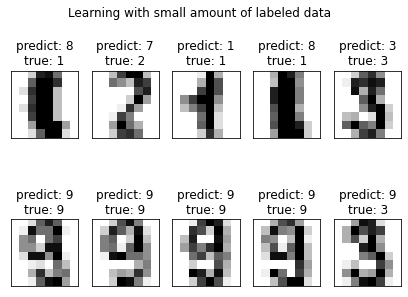

 Label Spreading model: 10 labeled & 990 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       0.64      0.54      0.59       101
           2       0.97      0.77      0.86        99
           3       0.84      0.99      0.91       103
           4       0.98      0.85      0.91        97
           5       0.54      0.69      0.60        99
           6       0.67      1.00      0.80       100
           7       0.92      0.99      0.96        98
           8       0.68      0.85      0.76        97
           9       0.88      0.15      0.26        98

    accuracy                           0.78       990
   macro avg       0.81      0.78      0.76       990
weighted avg       0.81      0.78      0.76       990

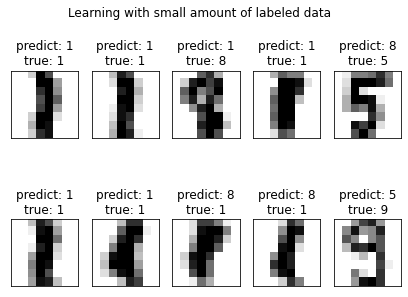




Label Spreading model: 100 labeled & 900 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.70      0.56      0.62        90
           2       0.92      0.99      0.95        90
           3       0.97      0.97      0.97        92
           4       1.00      0.94      0.97        90
           5       0.99      0.92      0.95        91
           6       0.75      0.99      0.85        90
           7       0.96      0.89      0.92        89
           8       0.91      0.88      0.89        90
           9       0.78      0.81      0.79        90

    accuracy                           0.89       900
   macro avg       0.90      0.89      0.89       900
weighted avg       0.90      0.89      0.89       900

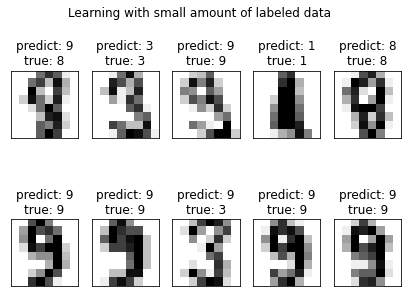

Label Spreading model: 250 labeled & 750 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.62      0.41      0.49        76
           2       0.94      0.99      0.96        74
           3       0.99      0.97      0.98        78
           4       1.00      0.93      0.97        74
           5       1.00      0.91      0.95        74
           6       0.71      1.00      0.83        76
           7       0.96      0.96      0.96        74
           8       0.83      0.91      0.86        74
           9       0.81      0.78      0.79        76

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

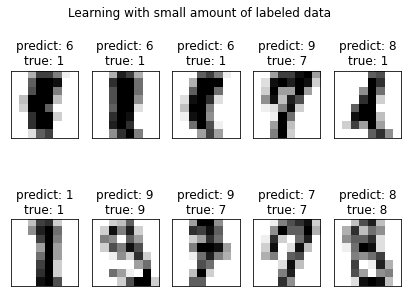

For label propagation more labeled data does not always equal best results,
The accuracy drops as the labeled data increased. This is prob due to the fact that the variance in the labeled data increases as different examples are passed. There is a sweet spot for the most accurate results, 10 labeled items were too little and made the accuracy drop; 50 was found to perform best.